In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [26]:
data = pd.read_csv('lung_cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Размер датасета

In [27]:
data.shape

(309, 16)

Статистическая информация

In [28]:
data.describe(include='all')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


Информация о наборе данных

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Выведем название диагнозов

In [30]:
data['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

Проверим кол-во строк в каждом диагнозе

In [31]:
data['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


Визуализация данных

<ipython-input-32-b5113b4ad71f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=data, palette='coolwarm')


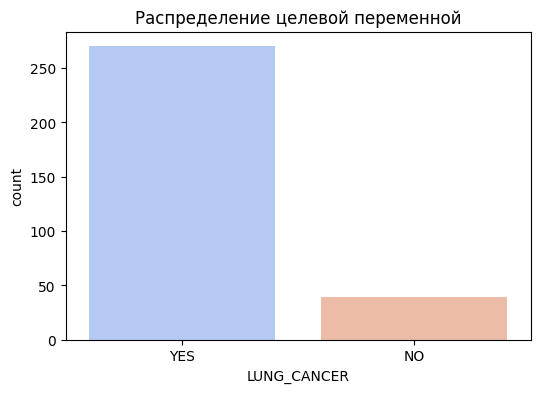

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.show()

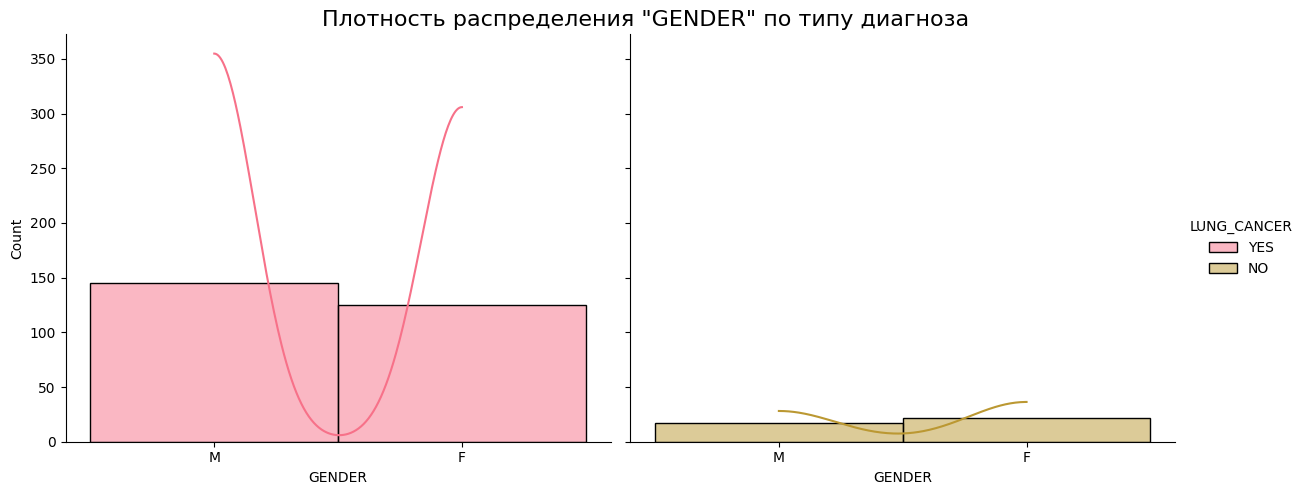

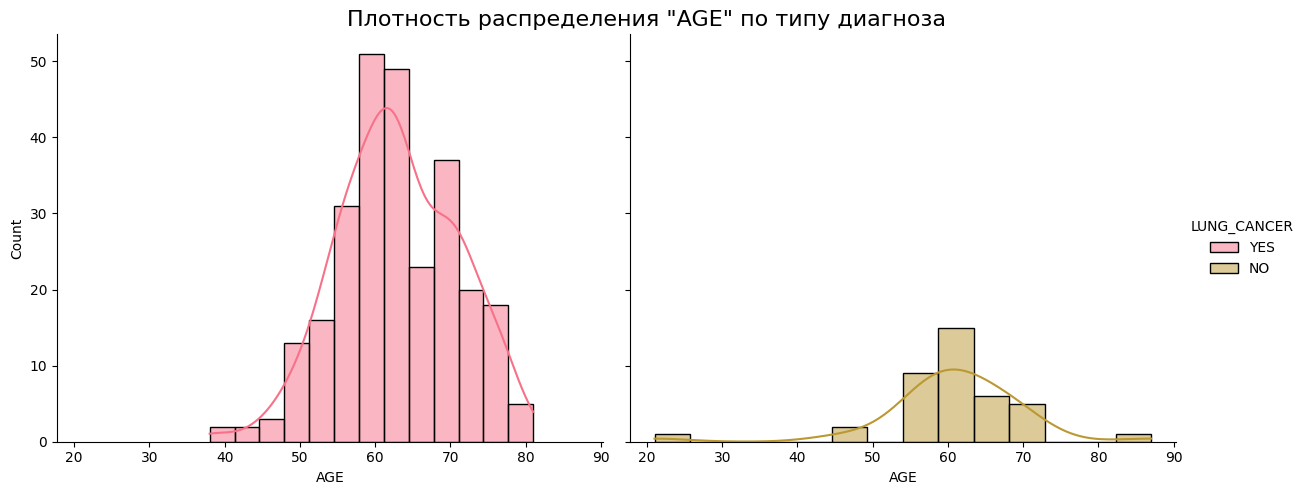

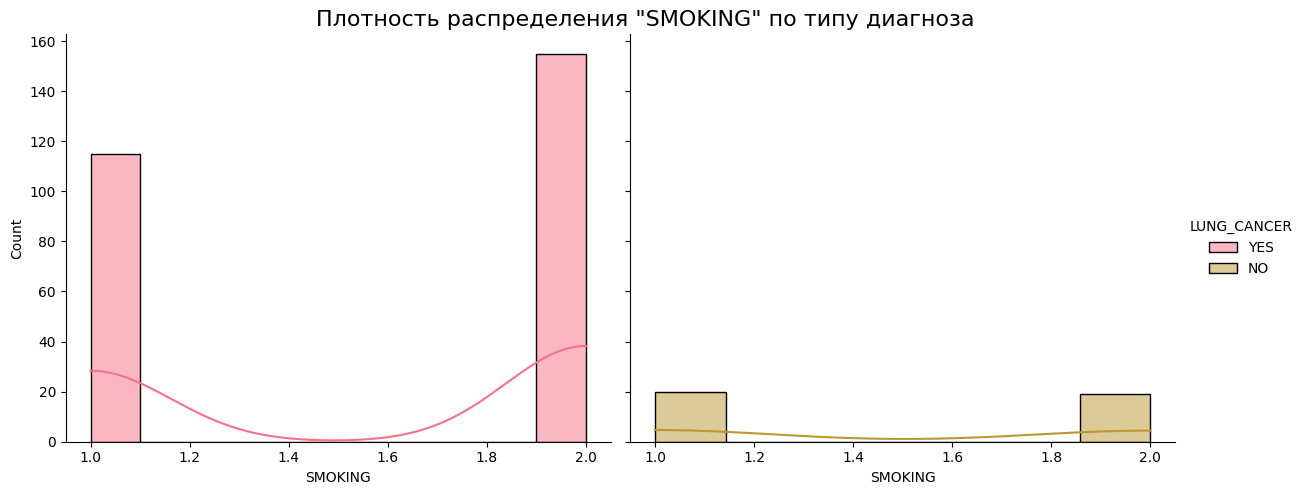

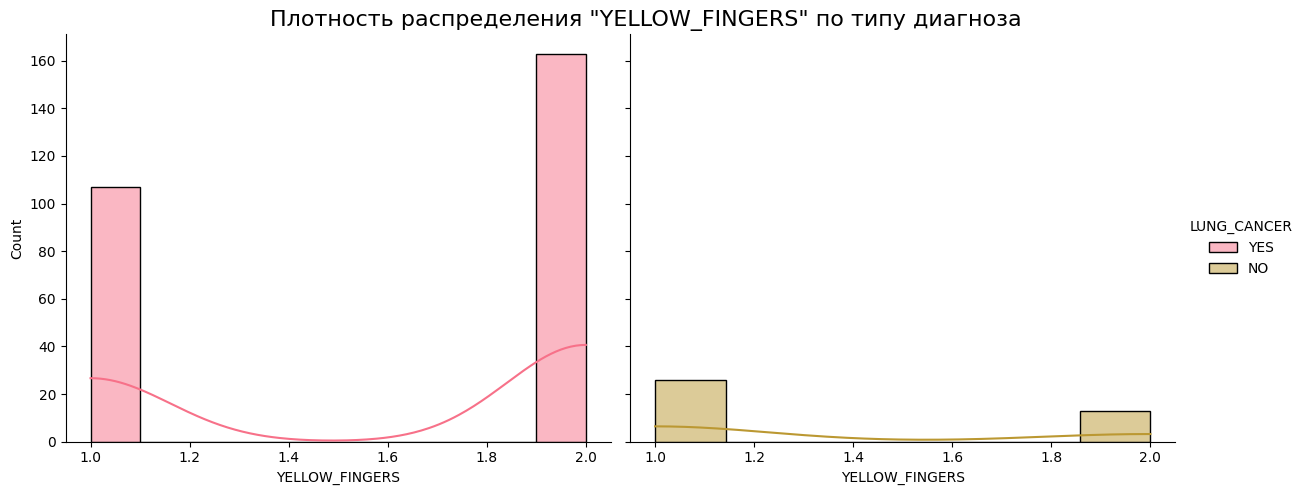

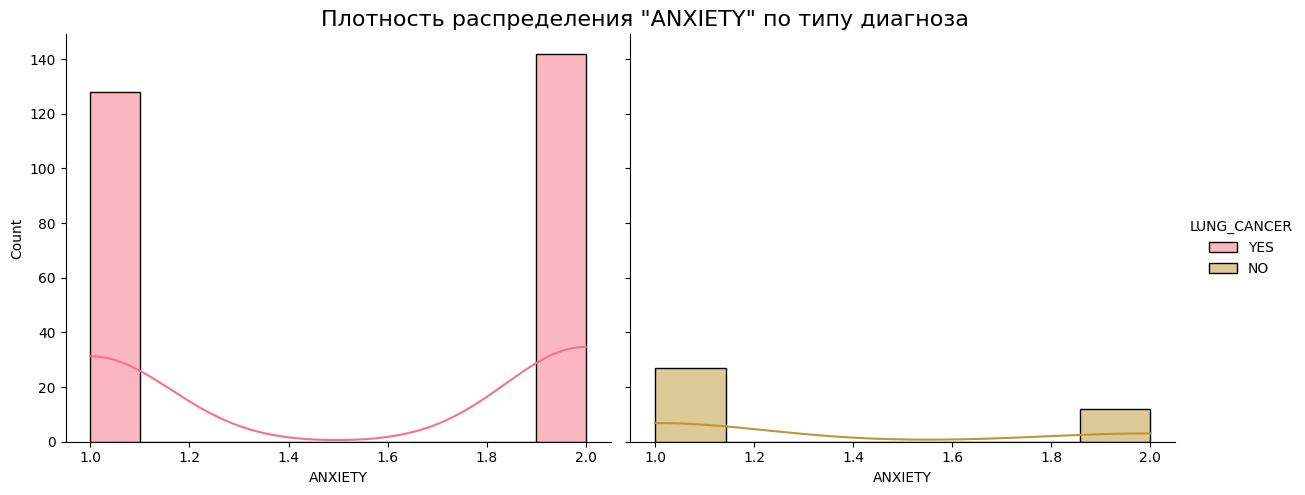

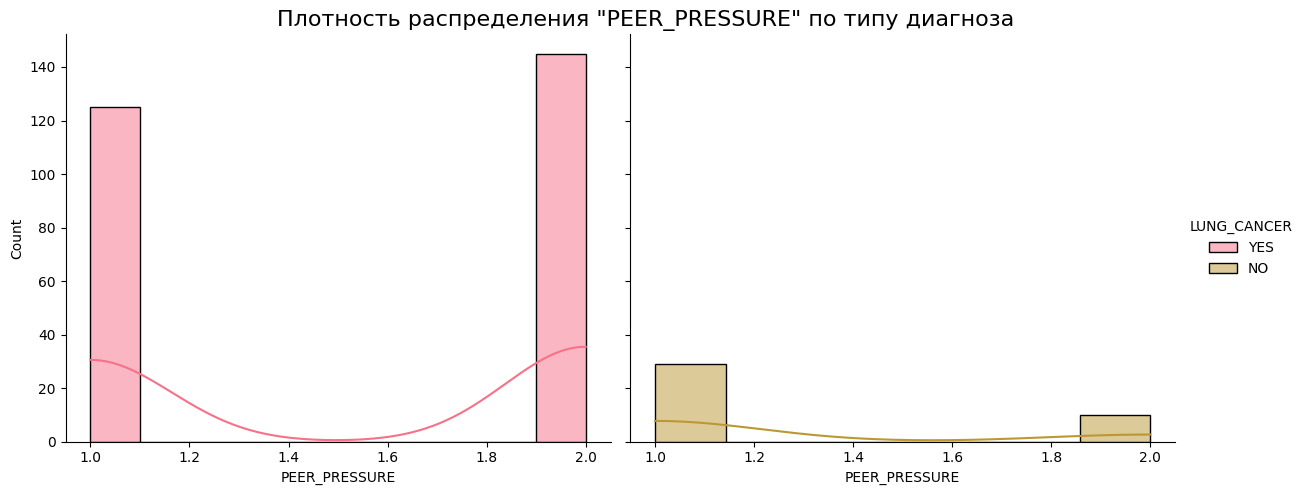

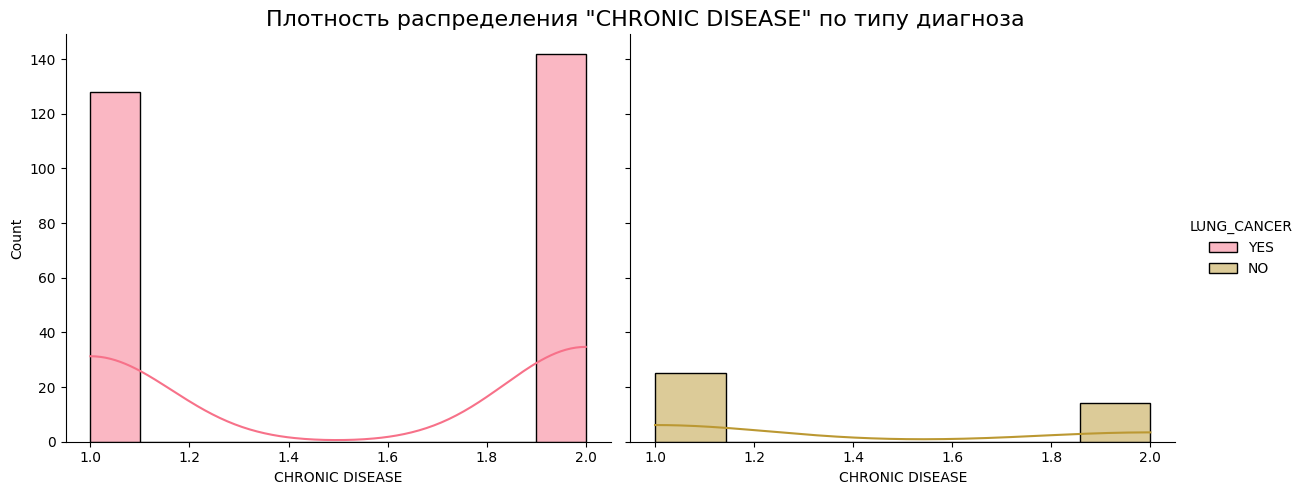

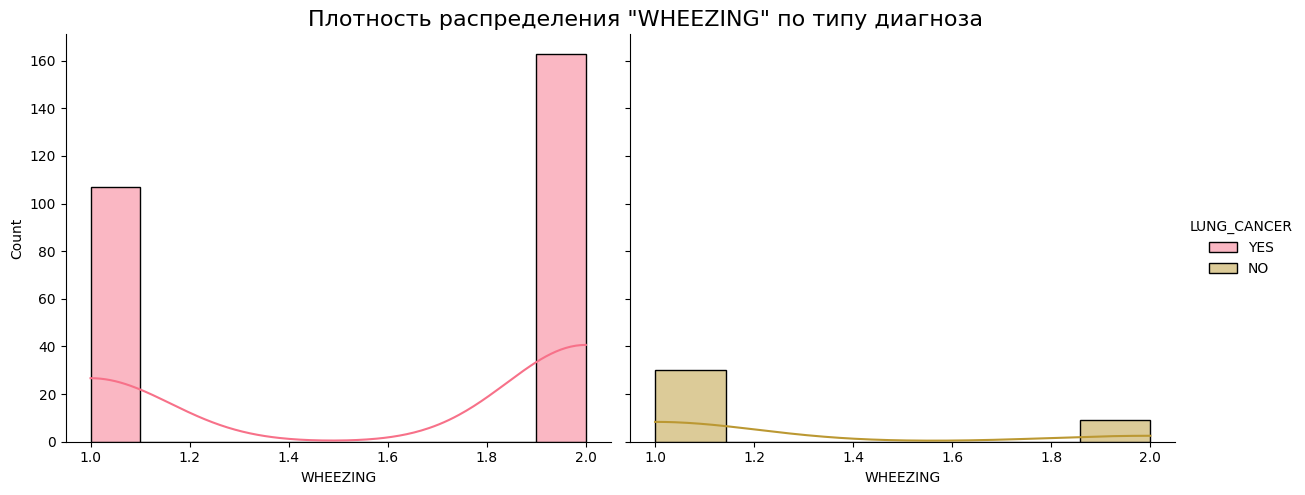

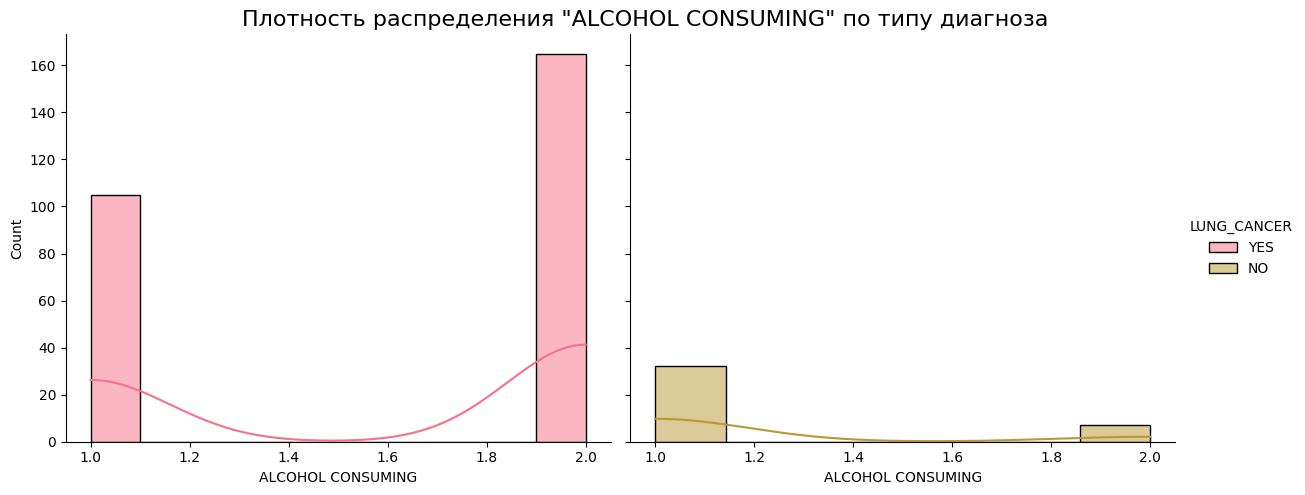

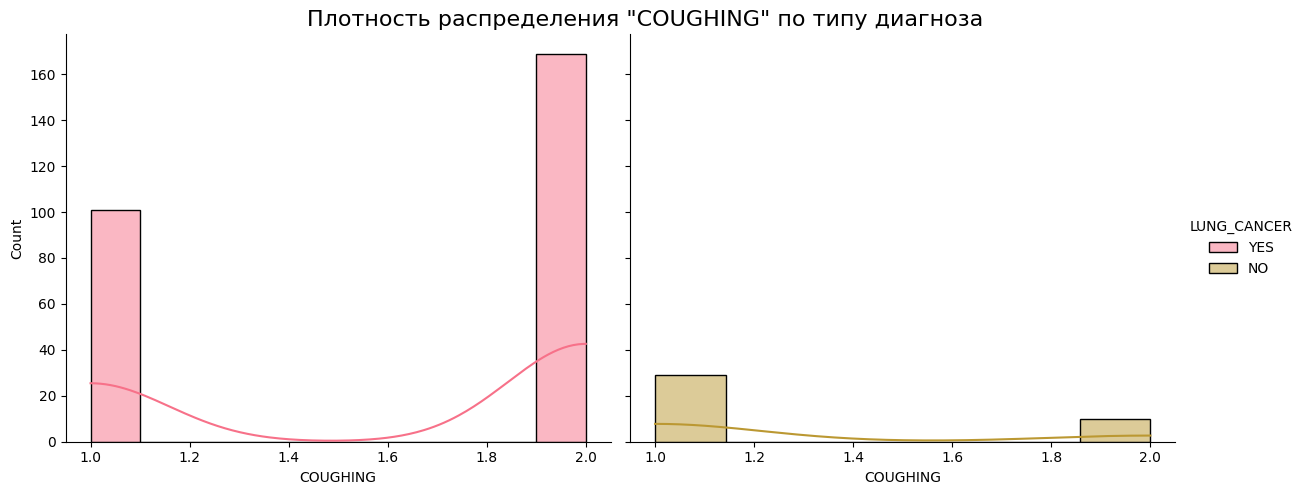

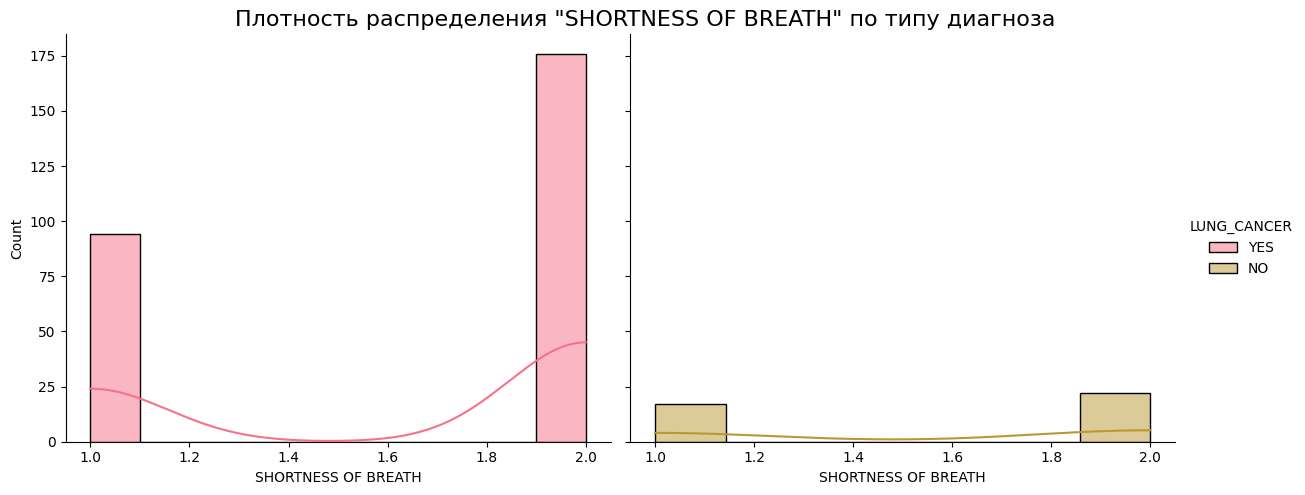

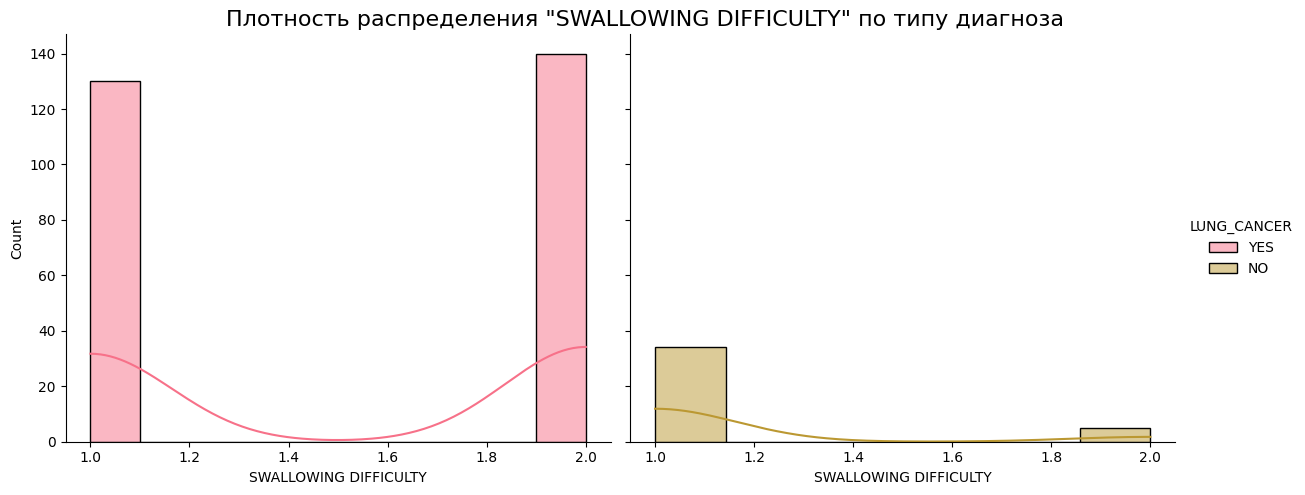

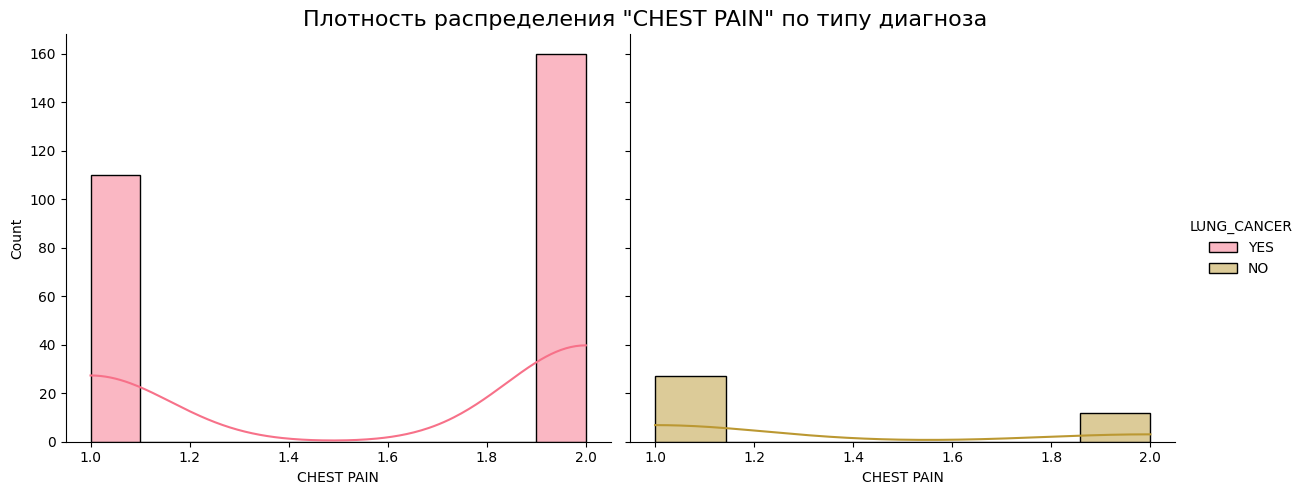

In [36]:
features = [
    'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

for feature in features:
    g = sns.FacetGrid(data, col='LUNG_CANCER', hue='LUNG_CANCER', height=5, aspect=1.2)
    g.map(sns.histplot, feature, kde=True)
    g.add_legend()
    g.set_titles("")
    g.fig.suptitle(f'Плотность распределения "{feature}" по типу диагноза', fontsize=16)
    plt.show()

Парные графики параметров

<Figure size 1200x1000 with 0 Axes>

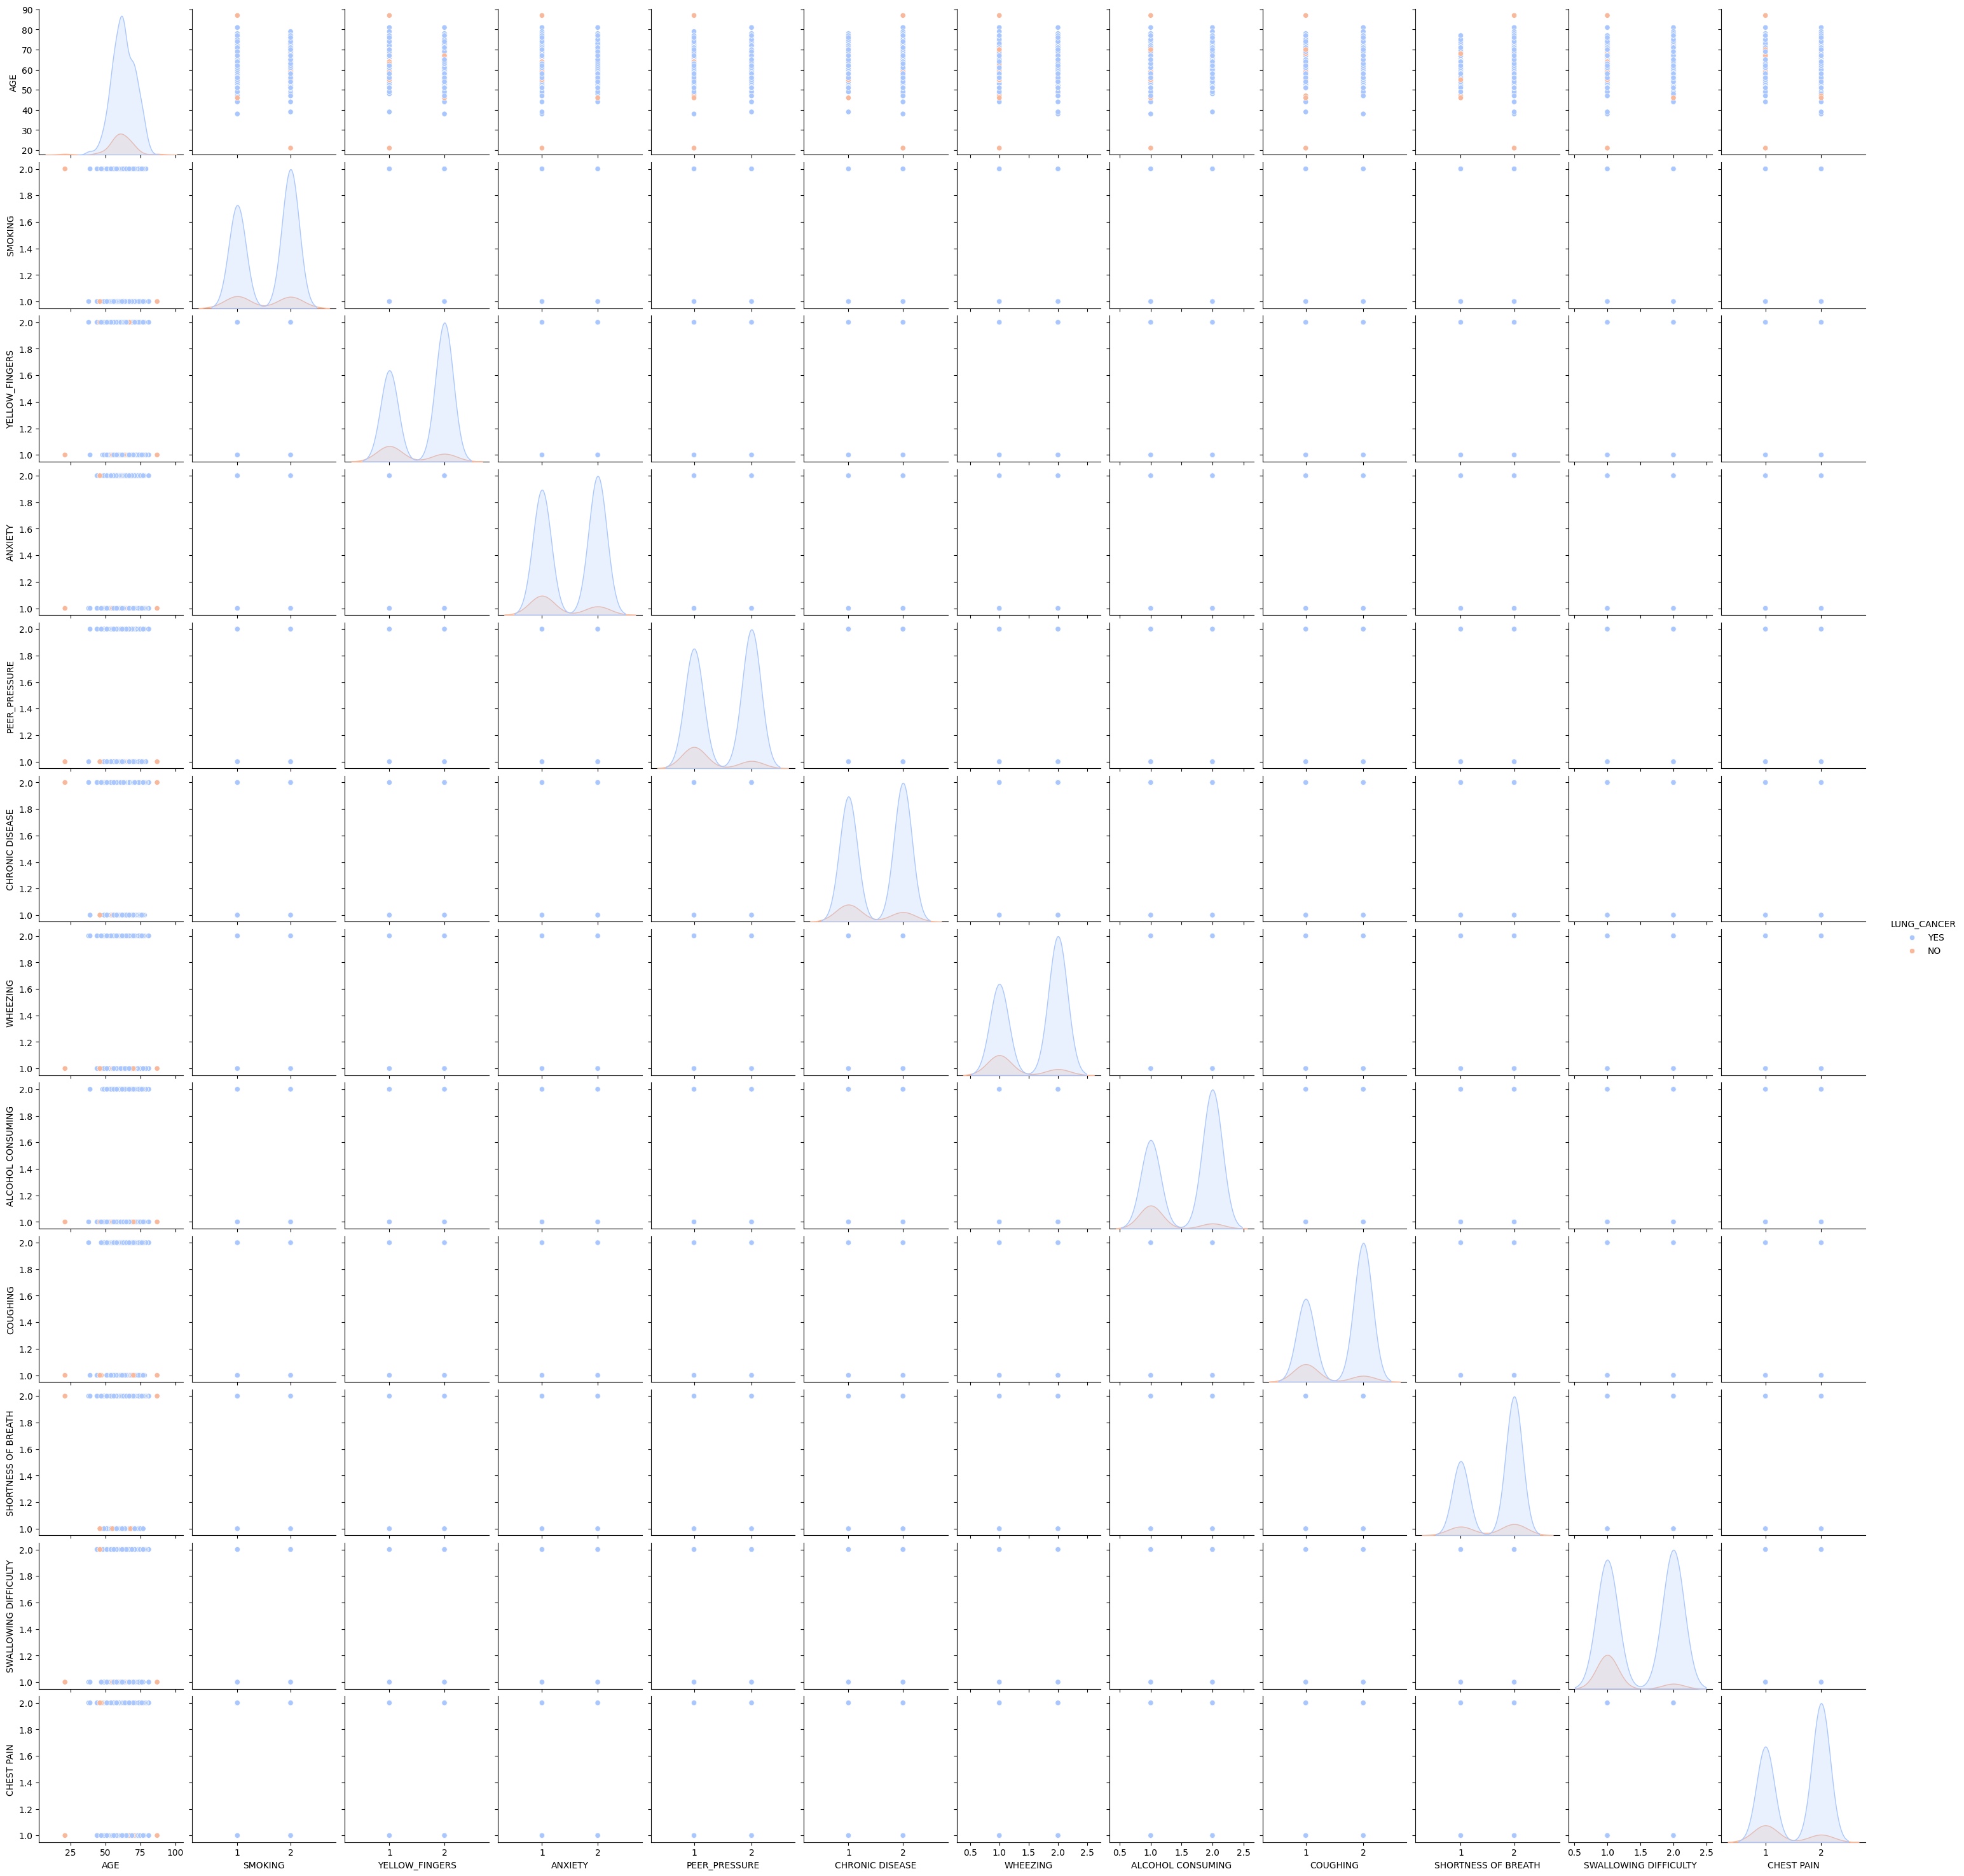

In [40]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']], hue='LUNG_CANCER', palette='coolwarm')
plt.show()

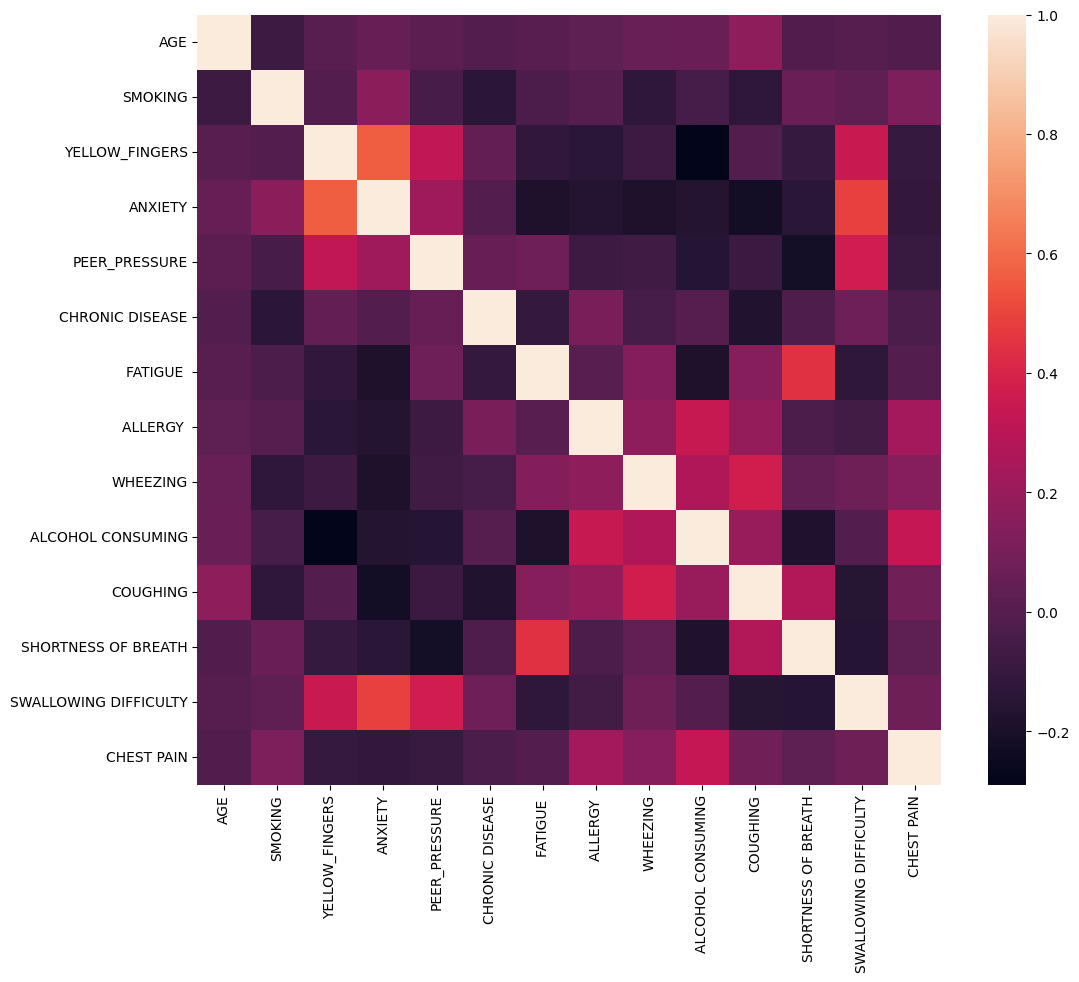

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True))
plt.show()


Разобьем датасет на:
Y - целевая переменная, которую предсказываем (diagnosis).
X - весь набор данных без целевой переменной.

In [42]:
X = data.drop(['LUNG_CANCER'], axis=1)
y = data['LUNG_CANCER']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (309, 15) | y shape: (309,) 


Train Test разделение (80/20)

In [44]:
y_mapped = y.map({'YES': 0, 'NO': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=17, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.07450893697013974, pvalue=0.9406539558329008, df=307.0)

Обучение и выбор оптимальной модели
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)

In [52]:
X_train['GENDER'] = X_train['GENDER'].replace({'F': 1, 'M': 0})

X_train = X_train.apply(pd.to_numeric, errors='coerce')

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.907000 (0.036077)
LDA: 0.915333 (0.041391)
KNN: 0.878833 (0.039715)
CART: 0.886833 (0.029406)
NB: 0.891000 (0.050223)
SVC: 0.874500 (0.011715)


По показателям лучшей моделью является Linear Discriminant Analysis (LDA).

Обучение конкретной модели

In [56]:
X_test['GENDER'] = X_test['GENDER'].replace({'F': 1, 'M': 0})

sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')


sk LDA accuracy: 0.9193548387096774
sk LDA prediction: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
sk transformed features
[[-11.06150626 -12.92365132 -12.57935731 -11.12057067 -13.03804816]]


<Axes: title={'center': 'LDA surface with original features'}>

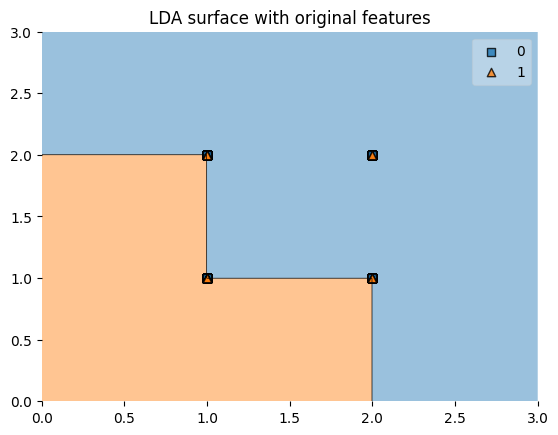

In [59]:
y_s = y_train
X_2d= X_train[['CHEST PAIN', 'COUGHING']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

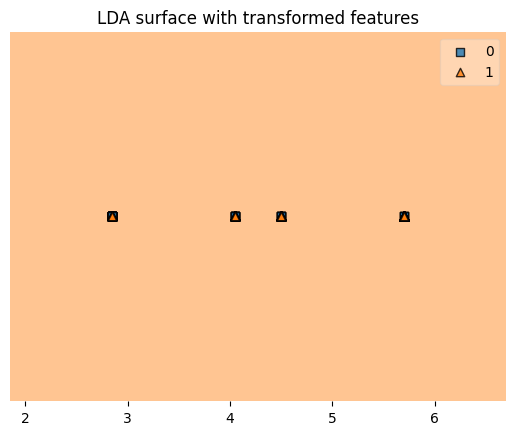

In [64]:
data["GENDER"] = data["GENDER"].map({'F': 1, 'M': 0})

df = data["LUNG_CANCER"].map({'NO': 0, 'YES': 1})

Xs = data[['CHEST PAIN', 'COUGHING']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(Xs, ys).transform(Xs)

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)


In [65]:
predicted = sk_lda2.predict(X1_lda_test)

In [66]:
#Accuracy
accuracy = metrics.accuracy_score(y1_test, predicted)

print("Accuracy:", round(accuracy,2))

#Recall, Precision
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 0.87
Recall (all 1s predicted right): 0.87
Precision (confidence when predicting a 1): 0.76
Detail:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.87      1.00      0.93        68

    accuracy                           0.87        78
   macro avg       0.44      0.50      0.47        78
weighted avg       0.76      0.87      0.81        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m